In [94]:
import pandas as pd
import numpy as np 
import sklearn as sk
import statsmodels.api as sm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [108]:
df = pd.read_csv('/Users/liamcarney9/Downloads/loan_default_data_set.csv')

In [22]:
# 1 A

In [9]:
df.isna().sum()

tot_balance                           0
avg_bal_cards                         0
credit_age                            0
credit_age_good_account               0
credit_card_age                       0
num_acc_30d_past_due_12_months        0
num_acc_30d_past_due_6_months         0
num_mortgage_currently_past_due       0
tot_amount_currently_past_due         0
num_inq_12_month                      0
num_card_inq_24_month                 0
num_card_12_month                     0
num_auto_ 36_month                    0
uti_open_card                         0
pct_over_50_uti                       0
uti_max_credit_line                   0
pct_card_over_50_uti               1958
ind_XYZ                               0
rep_income                         1559
rep_education                         1
Def_ind                               0
dtype: int64

In [130]:
df.head()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
0,102956.1101,14819.05740,238,104,264,0,0,0,0.0,0,...,1,0,0.366737,0.342183,0.513934,0.550866,0,118266.32130,college,0
1,132758.7258,18951.93455,384,197,371,0,0,0,0.0,0,...,0,0,0.490809,0.540671,0.418016,0.550964,0,89365.05765,college,0
2,124658.9174,15347.92969,277,110,288,0,0,0,0.0,0,...,0,0,0.359074,0.338560,0.341627,0.451417,0,201365.12130,college,0
3,133968.5369,14050.71334,375,224,343,0,0,0,0.0,2,...,1,0,0.700379,0.683589,0.542940,0.607843,0,191794.48550,college,0
4,143601.8017,14858.51527,374,155,278,0,0,0,0.0,0,...,0,0,0.647351,0.510812,0.632934,0.573680,0,161465.36790,graduate,0


In [109]:
df.shape, df.columns, df.dtypes, df.head()

((20000, 21),
 Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
        'credit_card_age', 'num_acc_30d_past_due_12_months',
        'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
        'tot_amount_currently_past_due', 'num_inq_12_month',
        'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
        'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
        'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'rep_education',
        'Def_ind'],
       dtype='object'),
 tot_balance                        float64
 avg_bal_cards                      float64
 credit_age                           int64
 credit_age_good_account              int64
 credit_card_age                      int64
 num_acc_30d_past_due_12_months       int64
 num_acc_30d_past_due_6_months        int64
 num_mortgage_currently_past_due      int64
 tot_amount_currently_past_due      float64
 num_inq_12_month                     int64
 num_c

In [5]:
# There appears to be 1958 missing values for 'pct_card_over_50_uti', 1559 missing values for 'rep_income' and 1 
# missing value for 'rep_education'

In [110]:
# Replace missing values with the mean for each column
columns_to_fill = ['pct_card_over_50_uti', 'rep_income']
for column in columns_to_fill:
    mean = df[column].mean()  
    df[column].fillna(mean, inplace=True)  
for column in df.columns:
    mode = df[column].mode().iloc[0]  
    df[column] = df[column].fillna(mode)  

In [111]:
df.isna().sum()

tot_balance                        0
avg_bal_cards                      0
credit_age                         0
credit_age_good_account            0
credit_card_age                    0
num_acc_30d_past_due_12_months     0
num_acc_30d_past_due_6_months      0
num_mortgage_currently_past_due    0
tot_amount_currently_past_due      0
num_inq_12_month                   0
num_card_inq_24_month              0
num_card_12_month                  0
num_auto_ 36_month                 0
uti_open_card                      0
pct_over_50_uti                    0
uti_max_credit_line                0
pct_card_over_50_uti               0
ind_XYZ                            0
rep_income                         0
rep_education                      0
Def_ind                            0
dtype: int64

In [13]:
# 'pct_card_over_50_uti' and 'rep_income' were columns with integers so I used the mean to fill the missing values. 
# 'rep_education', however, was a string value so I used the mode to fill the single missing value

In [21]:
# 1 B

In [112]:
value_counts = df['rep_education'].value_counts()
proportions = value_counts / len(df)

print(proportions)

college        0.6069
high_school    0.2657
graduate       0.1203
other          0.0071
Name: rep_education, dtype: float64


In [19]:
# I took the proportions of each value of the 'rep_education' variable and took the proportions, showing us that the 
# value 'other' is the least represented by a landslide

In [20]:
# 1 C

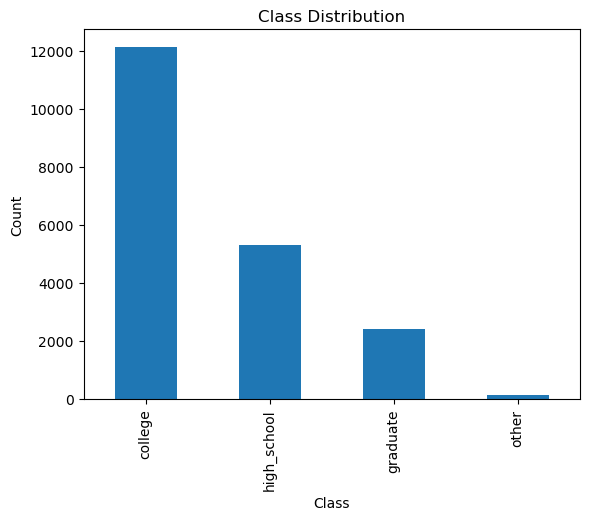

The classes are not balanced.


In [113]:
import matplotlib.pyplot as plt

class_counts = df['rep_education'].value_counts()

# Check the balance by comparing class counts
is_balanced = class_counts.min() / class_counts.max() > 0.8  # Define a balance threshold (adjust as needed)

# Visualize class distribution with a bar chart
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

if is_balanced:
    print("The classes are balanced.")
else:
    print("The classes are not balanced.")

In [25]:
# 1 D

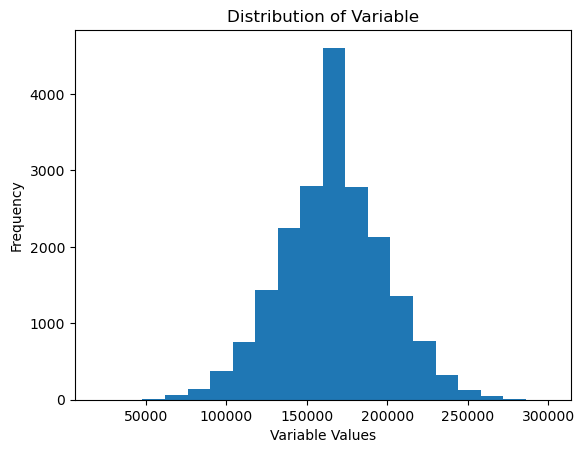

In [114]:
plt.hist(df['rep_income'], bins=20)
plt.xlabel('Variable Values')
plt.ylabel('Frequency')
plt.title('Distribution of Variable')
plt.show()

In [28]:
# The histogram shows that 'rep_income' is not skewed and that it appears to be normally distributed

In [35]:
# 1 E

In [115]:
grouped = df.groupby('rep_education')['Def_ind']

mean_by_group = grouped.mean()

print(mean_by_group)

rep_education
college        0.096968
graduate       0.081879
high_school    0.115732
other          0.077465
Name: Def_ind, dtype: float64


In [36]:
# It appears that the high school group is most likely to default on loans

In [37]:
# 1 F

In [116]:
correlation_matrix = df.corr()

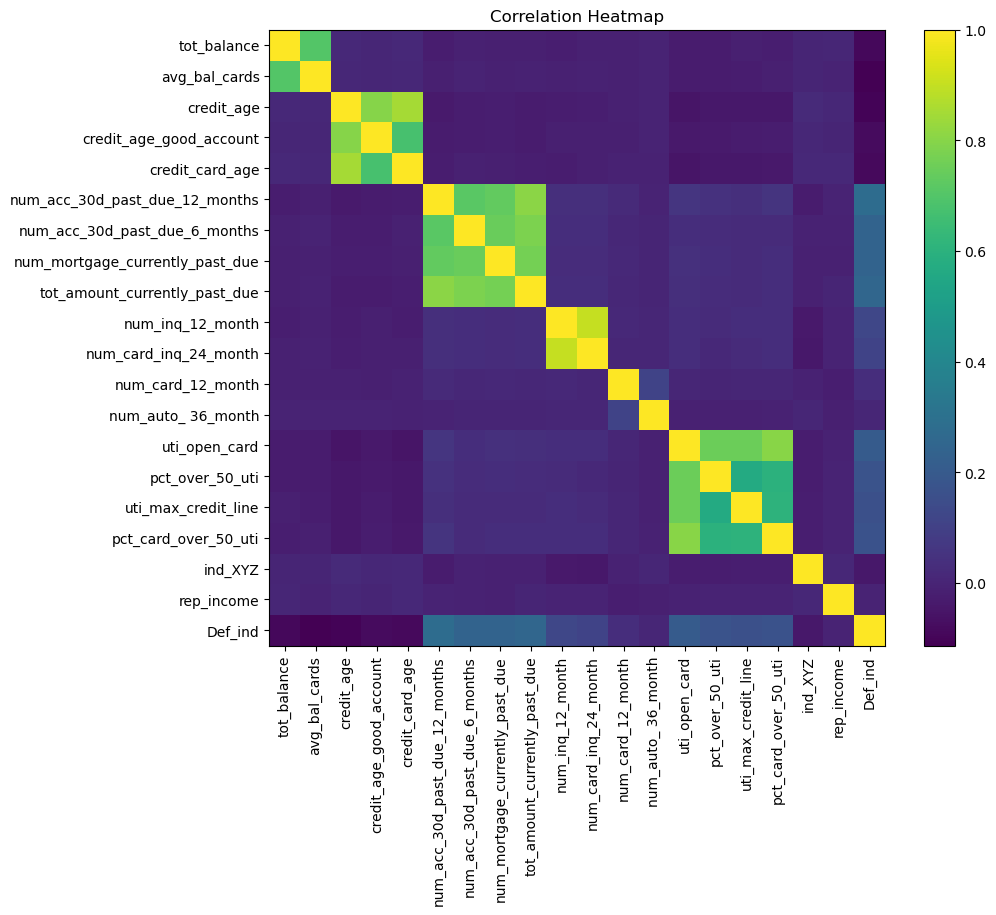

In [117]:
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

In [44]:
# There does appear to be a bit of multicollinearity as some of the variables are pretty highly correlated with others

In [46]:
# 1 2/3

In [118]:
df_new = pd.get_dummies(df, columns = ['rep_education'])

In [119]:
y = df_new.Def_ind
X = df_new.loc[:, df_new.columns != 'Def_ind']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [120]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [121]:
y_pred = model.predict(X_test)

In [122]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

MSE,MAE

(0.10625, 0.10625)

In [123]:
array = model.coef_
array

array([[-4.78412846e-07, -1.14007607e-04, -2.21096628e-03,
        -9.19203513e-04, -1.74963226e-03,  1.05300383e-05,
         2.24592246e-06,  2.62045367e-06,  2.55336530e-04,
         3.55797315e-05,  5.52225178e-05,  3.91694926e-06,
        -9.15205427e-08,  6.67986569e-06,  5.08418567e-06,
         4.97495917e-06,  4.94254642e-06, -5.21676055e-06,
         1.24525053e-06, -3.21141386e-06, -1.28943360e-06,
         3.55624532e-06, -4.20018789e-08]])

In [124]:
model.score(X_test, y_test)

0.89375

In [125]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(accuracy)
print(precision)
print(recall)

0.89375
0.7317073170731707
0.06756756756756757


In [91]:
# The mean absolute error and mean squared error appear to be low, indicating the model being accurate, along with 
# a high R-sqaured of .89375, emphasizing the precision of this fit. The accuracy score is the same as the R-squared,
# It is a relatively precise model, with a score of .73, and has a low recall of .067. 

In [61]:
# 1 4

In [126]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[3545   11]
 [ 414   30]]


In [64]:
# given that the numbers in the left column are much laarger than on the right, we can see that the model predicted
# many more negative values than positive, aas the left column is true and false negatives. True negatives is the
#top number and 3545>414 so the model did a pretty good job at correctly identifying the negative values. On the right
# we see that the model also correctly predicted the positive values at a 3:1 ratio as true positives are 30 compared
# to 11 false positives. 

In [127]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]

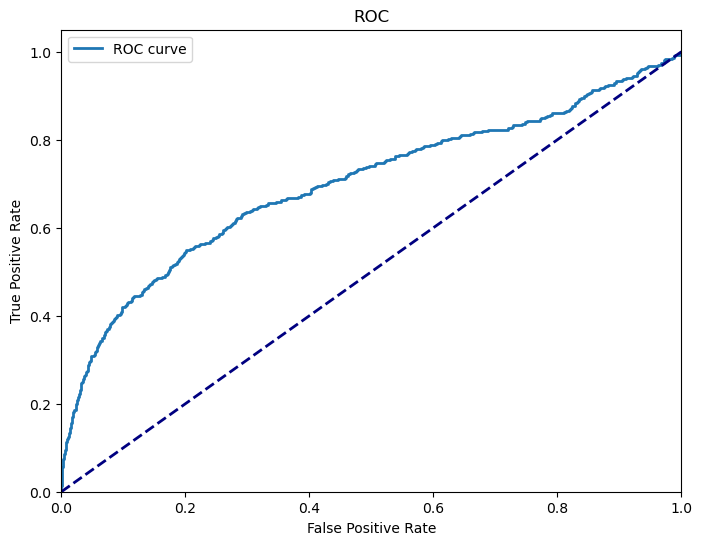

In [128]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="upper left")
plt.show()

In [69]:
# 1 6

In [129]:
abs_array = np.abs(array)
sorted_abs_array = np.sort(abs_array)[::-1]
sorted_abs_array

array([[4.20018789e-08, 9.15205427e-08, 4.78412846e-07, 1.24525053e-06,
        1.28943360e-06, 2.24592246e-06, 2.62045367e-06, 3.21141386e-06,
        3.55624532e-06, 3.91694926e-06, 4.94254642e-06, 4.97495917e-06,
        5.08418567e-06, 5.21676055e-06, 6.67986569e-06, 1.05300383e-05,
        3.55797315e-05, 5.52225178e-05, 1.14007607e-04, 2.55336530e-04,
        9.19203513e-04, 1.74963226e-03, 2.21096628e-03]])

In [134]:
variable_coefficient_pairs = []

for coefficient, X_train in zip(sorted_abs_array, X_train):
    variable_coefficient_pairs.append((X_train, coefficient))
    
print(variable_coefficient_pairs)


[('tot_balance', array([4.20018789e-08, 9.15205427e-08, 4.78412846e-07, 1.24525053e-06,
       1.28943360e-06, 2.24592246e-06, 2.62045367e-06, 3.21141386e-06,
       3.55624532e-06, 3.91694926e-06, 4.94254642e-06, 4.97495917e-06,
       5.08418567e-06, 5.21676055e-06, 6.67986569e-06, 1.05300383e-05,
       3.55797315e-05, 5.52225178e-05, 1.14007607e-04, 2.55336530e-04,
       9.19203513e-04, 1.74963226e-03, 2.21096628e-03]))]


In [ ]:
# The coefficients that effect 'Def_ind' the most are 4.2e-08, 9.15e-08 and 4.78e-07. 

In [70]:
# LDA 1

In [72]:
df_LDA = pd.read_csv('/Users/liamcarney9/Downloads/mobile_phone_prices.csv')

In [73]:
df_LDA.isna().sum()

battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
front_camera       0
four_g             0
int_memory         0
mobile_depth       0
mobile_weight      0
number_of cores    0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [75]:
df_LDA.shape, df_LDA.columns, df_LDA.dtypes

((2000, 21),
 Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
        'four_g', 'int_memory', 'mobile_depth', 'mobile_weight',
        'number_of cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
        'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
       dtype='object'),
 battery_power        int64
 bluetooth            int64
 clock_speed        float64
 dual_sim             int64
 front_camera         int64
 four_g               int64
 int_memory           int64
 mobile_depth       float64
 mobile_weight        int64
 number_of cores      int64
 pc                   int64
 px_height            int64
 px_width             int64
 ram                  int64
 sc_h                 int64
 sc_w                 int64
 talk_time            int64
 three_g              int64
 touch_screen         int64
 wifi                 int64
 price_range          int64
 dtype: object)

In [76]:
df_LDA.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,int_memory,mobile_depth,mobile_weight,number_of cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [78]:
y2 = df_LDA.price_range
X2 = df_LDA.loc[:, df_LDA.columns != 'price_range']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [81]:
model_LDA = LinearDiscriminantAnalysis()

In [82]:
model_LDA.fit(X2_train, y2_train)

LinearDiscriminantAnalysis()

In [ ]:
# LDA 4

In [83]:
model_LDA.coef_

array([[-7.69710850e-03, -1.98901217e-01,  9.37195286e-02,
         2.47911496e-01, -3.05172230e-02,  1.51798310e-01,
        -1.53854025e-02,  1.01082009e-01,  1.14650396e-02,
        -1.16481783e-02,  1.51032099e-02, -4.21564045e-03,
        -4.13732898e-03, -1.38826709e-02, -8.91577177e-04,
         6.95401251e-03, -2.37342540e-02, -3.73234192e-01,
         2.59974140e-01,  2.81739363e-01],
       [-2.11525153e-03, -5.35836670e-02, -4.17638586e-05,
         1.29094693e-01, -6.59045776e-03,  9.49083982e-02,
        -2.95761866e-03,  2.30188488e-01,  3.15574457e-03,
        -7.43302985e-02,  1.04946597e-02, -1.09399756e-03,
        -1.18695303e-03, -4.18478897e-03, -6.39845438e-04,
        -1.38536816e-02,  5.90063409e-03, -1.08134462e-01,
         1.07828653e-01,  1.09213704e-01],
       [ 2.22721402e-03,  4.06846548e-03, -5.38579077e-02,
        -1.68139576e-01,  2.03420860e-02, -2.08446879e-01,
         1.57466268e-03, -1.04074711e-01, -4.79704230e-04,
         4.48576291e-02, -1.0

In [84]:
model_LDA.score(X2_test, y2_test)

0.95

In [85]:
y2_pred = model_LDA.predict(X2_test)

In [89]:
conf_matrix_LDA = confusion_matrix(y2_test,y2_pred)

In [90]:
print(conf_matrix_LDA)

[[ 93   2   0   0]
 [  2  85   5   0]
 [  0   5  93   1]
 [  0   0   5 109]]


In [ ]:
# Based on this confusion matrix, the values going in a diagonal from the top left to the bottom right are very high,
# indicating that there are a lot of true positives for each class. The highest value of a non-true positive is a 5,
# showing us that the model did a very good job in predicting these values. 